# Polynomial interpolation
На отрезке $[a,b]=[-2,2]$ заданы функции $f_{1}(x)=\cos(2x)$ и $f_{2}(x)=\sin|x|+1$. 
- **Постройте интерполяционные многочлены в форме Ньютона степени n**, интерполирующие каждую из них
   1) на сетке равноотстоящих узлов;
   2) на сетке чебышѐвских узлов.
   
   В дальнейшем интерполяционный многочлен степени $n$, построенный к функции $f_{1}(x)$ на сетке равноотстоящих узлов будем обозначать $P_{1,n}$, а на сетке чебышѐвских узлов – $C_{1,n}$. Интерполяционный многочлен степени $n$, построенный к функции $f_{2(x)}$ на сетке равноотстоящих узлов будем обозначать $P_{2,n}$, а на сетке чебышѐвских узлов – $C_{2,n}$. 
- **Постройте шесть пары графиков:** график $P_{k,n}$ и график $C_{k,n}$ для $n = 3, 10, 20$. Каждый из этих графиков должен для сравнения быть совмещѐн с графиком интерполируемой функции $f_{1(x)}$. График $P_{k,n}$ строится по массиву точек, сгенерированному вашей программой. В файл необходимо вывести набор точек вида $(\overline{x_{i}}, P_{k,n}(\overline{x_{i}}))$, где $\overline{x}=a+i(b-a)/100$, $i=0,\cdots,100$. 
- **Таблицу вида (погрешность интерполяции):** для $n$ от 3 до 30
| $n$ |$\displaystyle \max_{i=0,100}|P_{k,n}(\overline{x})-f_{1}(\overline{x})|$|$\displaystyle \max_{i=0,100}|C_{k,n}(\overline{x})-f_{1}(\overline{x})|$|
    |:---|:---:|:----:|
    |$\cdots$|$\cdots$| $\cdots$|

In [221]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

### Определение границ интервала и функций для интерполяции

In [141]:
a, b = -2, 2
n = 100
def f1(x):
    return np.cos(2*x)
def f2(x):
    return np.sin(abs(x)) + 1

#### Определений функций, которые разбивают интервал на:
  1)  Равноотстоящие узлы
  2)  Узлы Чебышева

In [154]:
def equalNodes(n):
    return np.array([a+(b-a)*i/n for i in range(0,n+1)])
def chebyshevNodes(n):
    return np.array([0.5*(b-a)*np.cos((2*i+1)/(2*(n+1))*np.pi) for i in range(0,n+1)])

### Определение функции, заполняющей таблицу разделённых разностей

In [143]:
def dividedDifference(x,y):
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef[0,:]

### Определение функции, строящей и находящей значения интерполирующего многочлена

In [147]:
def NewtonInterpolation(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

### Определение функции для построения графиков

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
font = {"size" : 24}
matplotlib.rc('font', **font)
def paintGraphInterp(ax, n, f, chebyshev = False):
    nodes = equalNodes(n) if not chebyshev else chebyshevNodes(n)
    coef = dividedDifference(nodes, f(nodes))
    data = DataFrame({"x" : equalNodes(100), "y" : NewtonInterpolation(coef, nodes, equalNodes(100))})
    ax.plot(data.x, data.y, color="blue", label = "Polynomial interpolation", alpha = 0.9)
    ax.plot(data.x, f(data.x), color = "red", label = "Original function", alpha = 0.5)

### Построение графиков $P_{1,n}$ и  $C_{1,n}$ для $n = 3, 10, 20$

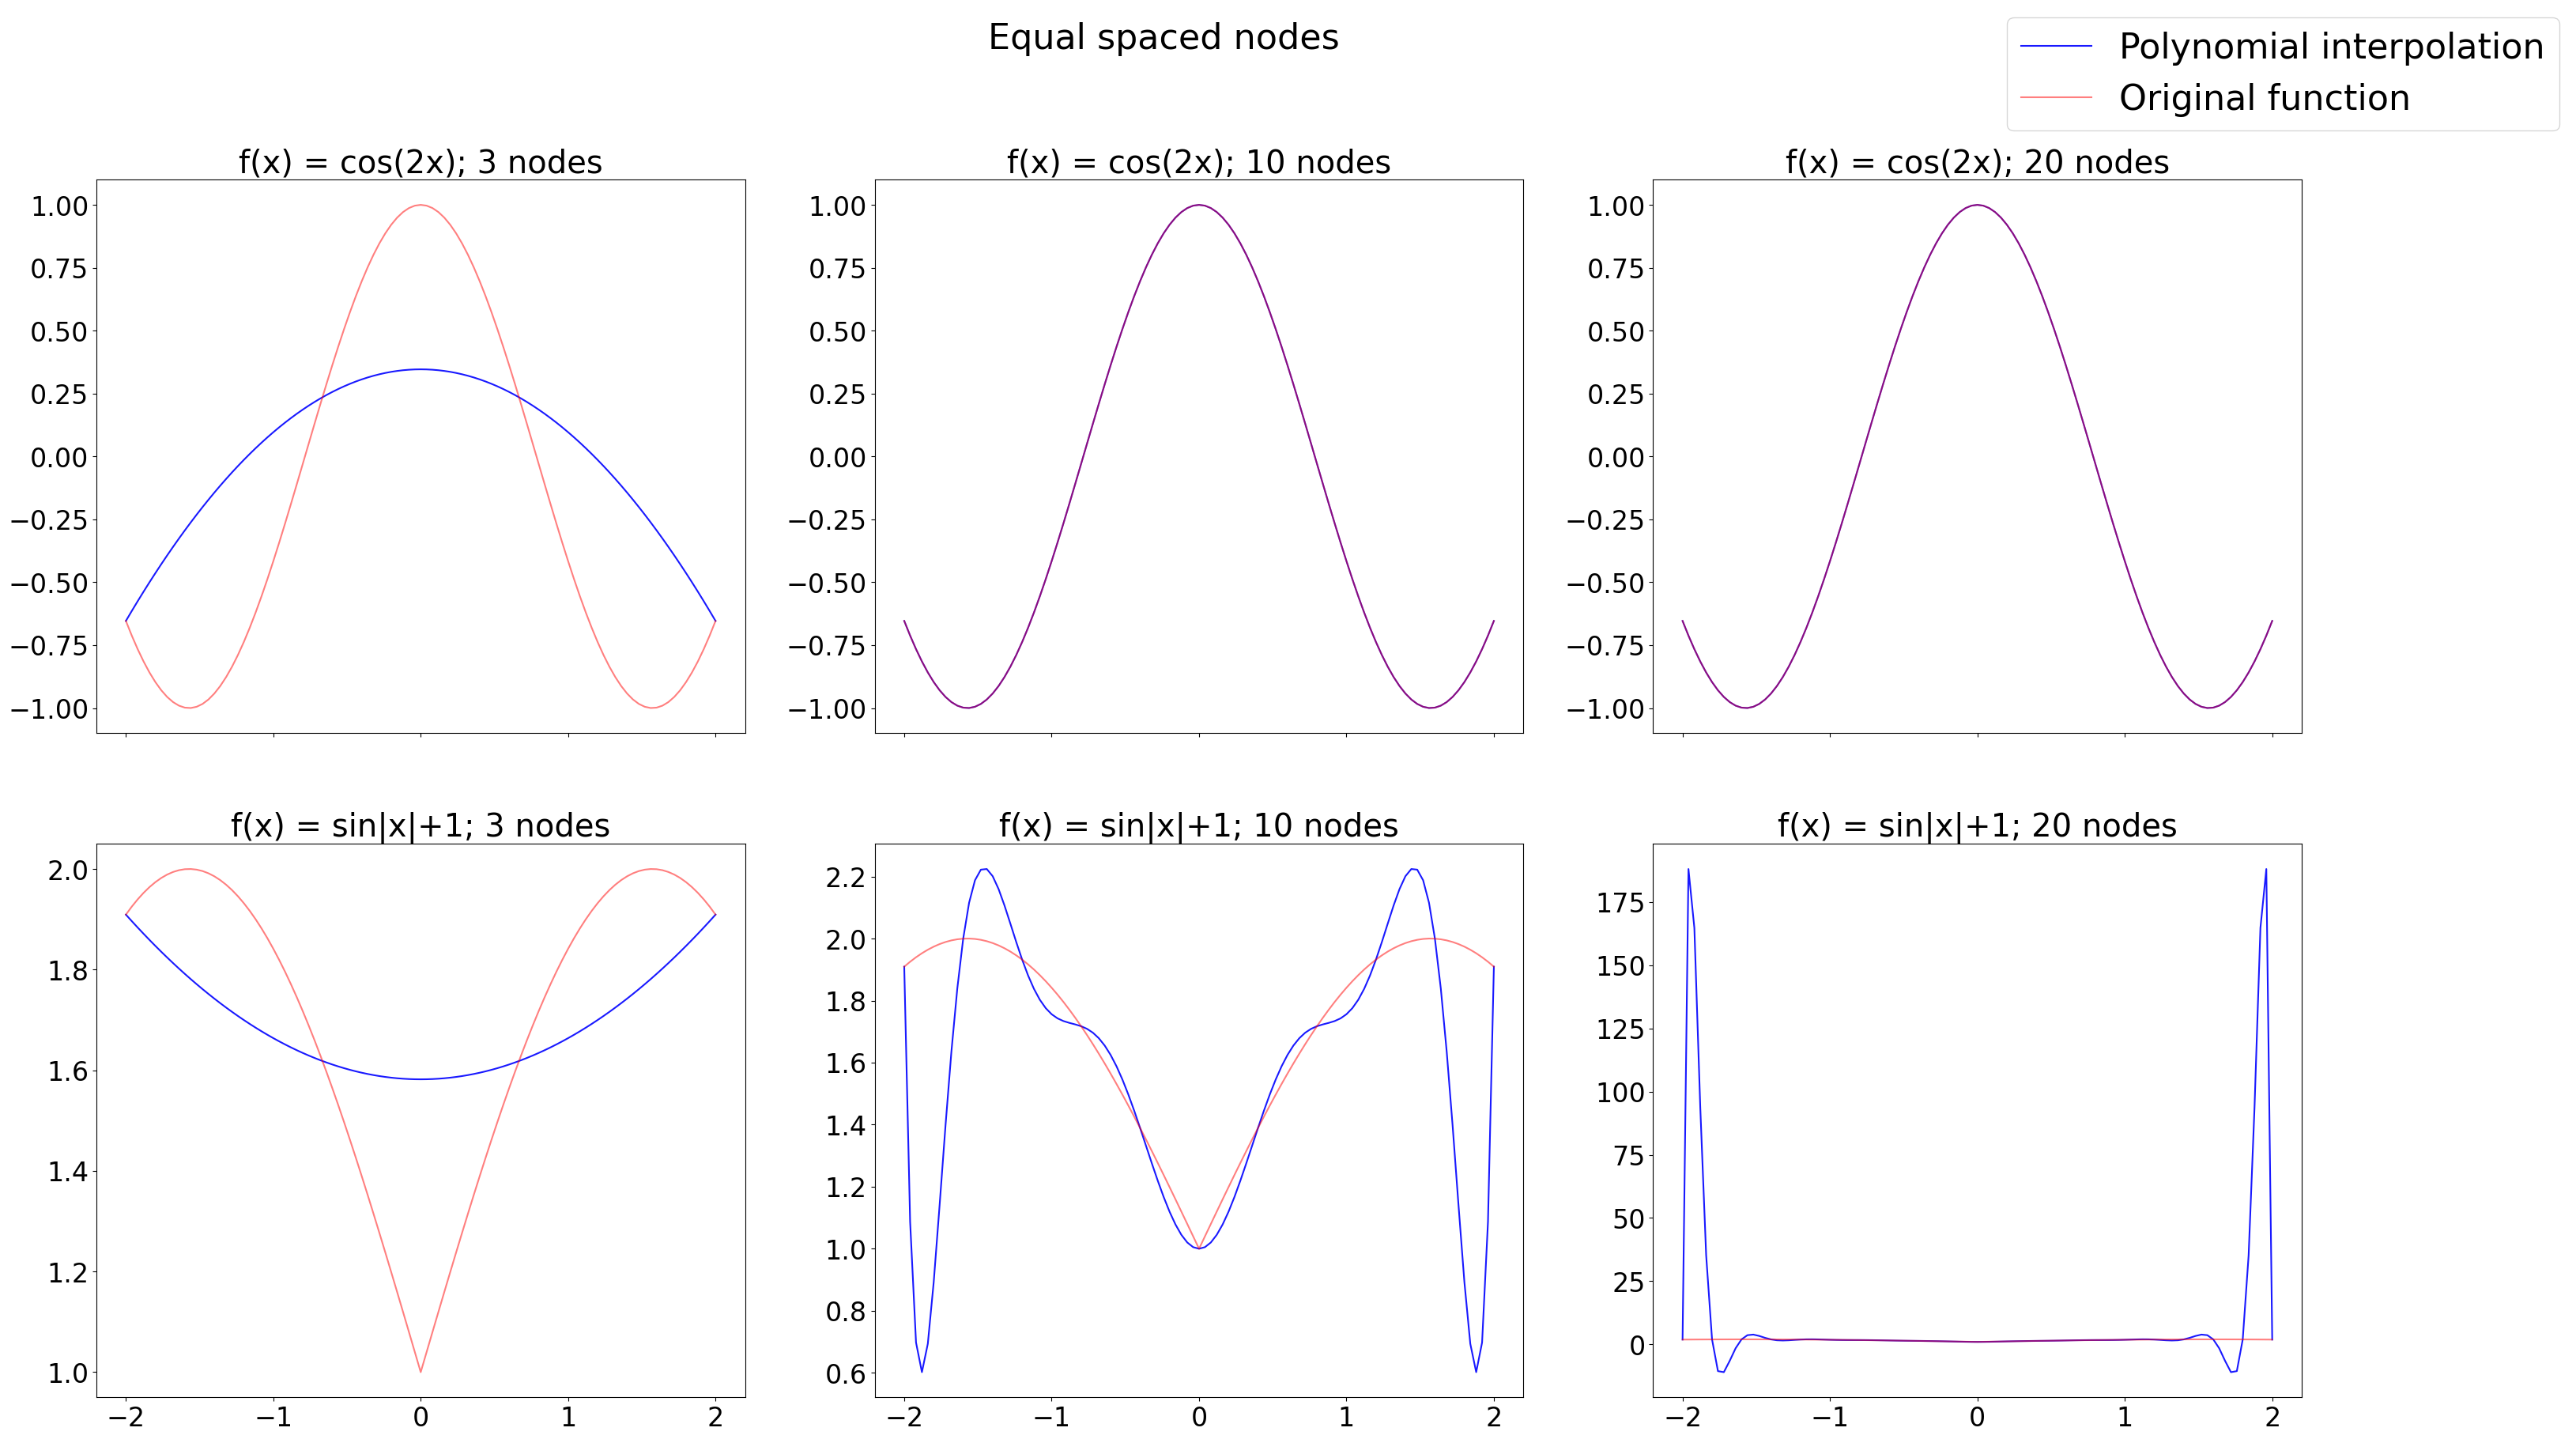

In [222]:
fig, axis = plt.subplots(2,3, sharex = True)
fig.suptitle("Equal spaced nodes", fontsize = 32)
fig.set_size_inches(36,20)
paintGraphInterp(axis[0,0], 3, f1)
paintGraphInterp(axis[0,1], 10, f1)  
paintGraphInterp(axis[0,2], 20, f1)
paintGraphInterp(axis[1,0], 3, f2)
paintGraphInterp(axis[1,1], 10, f2)
paintGraphInterp(axis[1,2], 20, f2)
axis[0,0].set_title("f(x) = cos(2x); 3 nodes")
axis[0,1].set_title("f(x) = cos(2x); 10 nodes")
axis[0,2].set_title("f(x) = cos(2x); 20 nodes")
axis[1,0].set_title("f(x) = sin|x|+1; 3 nodes")
axis[1,1].set_title("f(x) = sin|x|+1; 10 nodes")
axis[1,2].set_title("f(x) = sin|x|+1; 20 nodes");
lines, labels = axis[0,0].get_legend_handles_labels() 
fig.legend(lines, labels, fontsize = 32)
fig.savefig("Equal_spaced_nodes.png", dpi = 200)

### Построение таблицы погрешностей для $P_{1,n}$ и  $C_{1,n}$

In [220]:
errorEqual = DataFrame({"$P_{1,n}$" : [np.max(np.abs(NewtonInterpolation(
    dividedDifference(equalNodes(n), f1(equalNodes(n))),  
    equalNodes(n), equalNodes(100)) - f1(equalNodes(100)))) for n in range(3,31)],
                        "$C_{1,n}$" : [np.max(np.abs(NewtonInterpolation(
                            dividedDifference(equalNodes(n), f2(equalNodes(n))),
                            equalNodes(n), equalNodes(100)) - f1(equalNodes(100)))) for n in range(3,31)]})
errorEqual.index = range(3,31)
errorEqual.index.name = "$n$"
#errorEqual.to_excel("Error_Equal_Spaced.xlsx")
errorEqual

,"$P_{1,n}$","$C_{1,n}$"
$n$,,
3,7.985743e-01,2.792513
4,3.014843e-01,3.334909
5,2.068386e-01,3.102163
6,4.161626e-02,2.865203
7,2.888936e-02,2.965601
8,3.571322e-03,3.496897
9,2.531882e-03,3.030497
10,2.134462e-04,3.205691
11,1.502333e-04,3.035096


### Построение графиков $P_{2,n}$ и  $C_{2,n}$ для $n = 3, 10, 20$

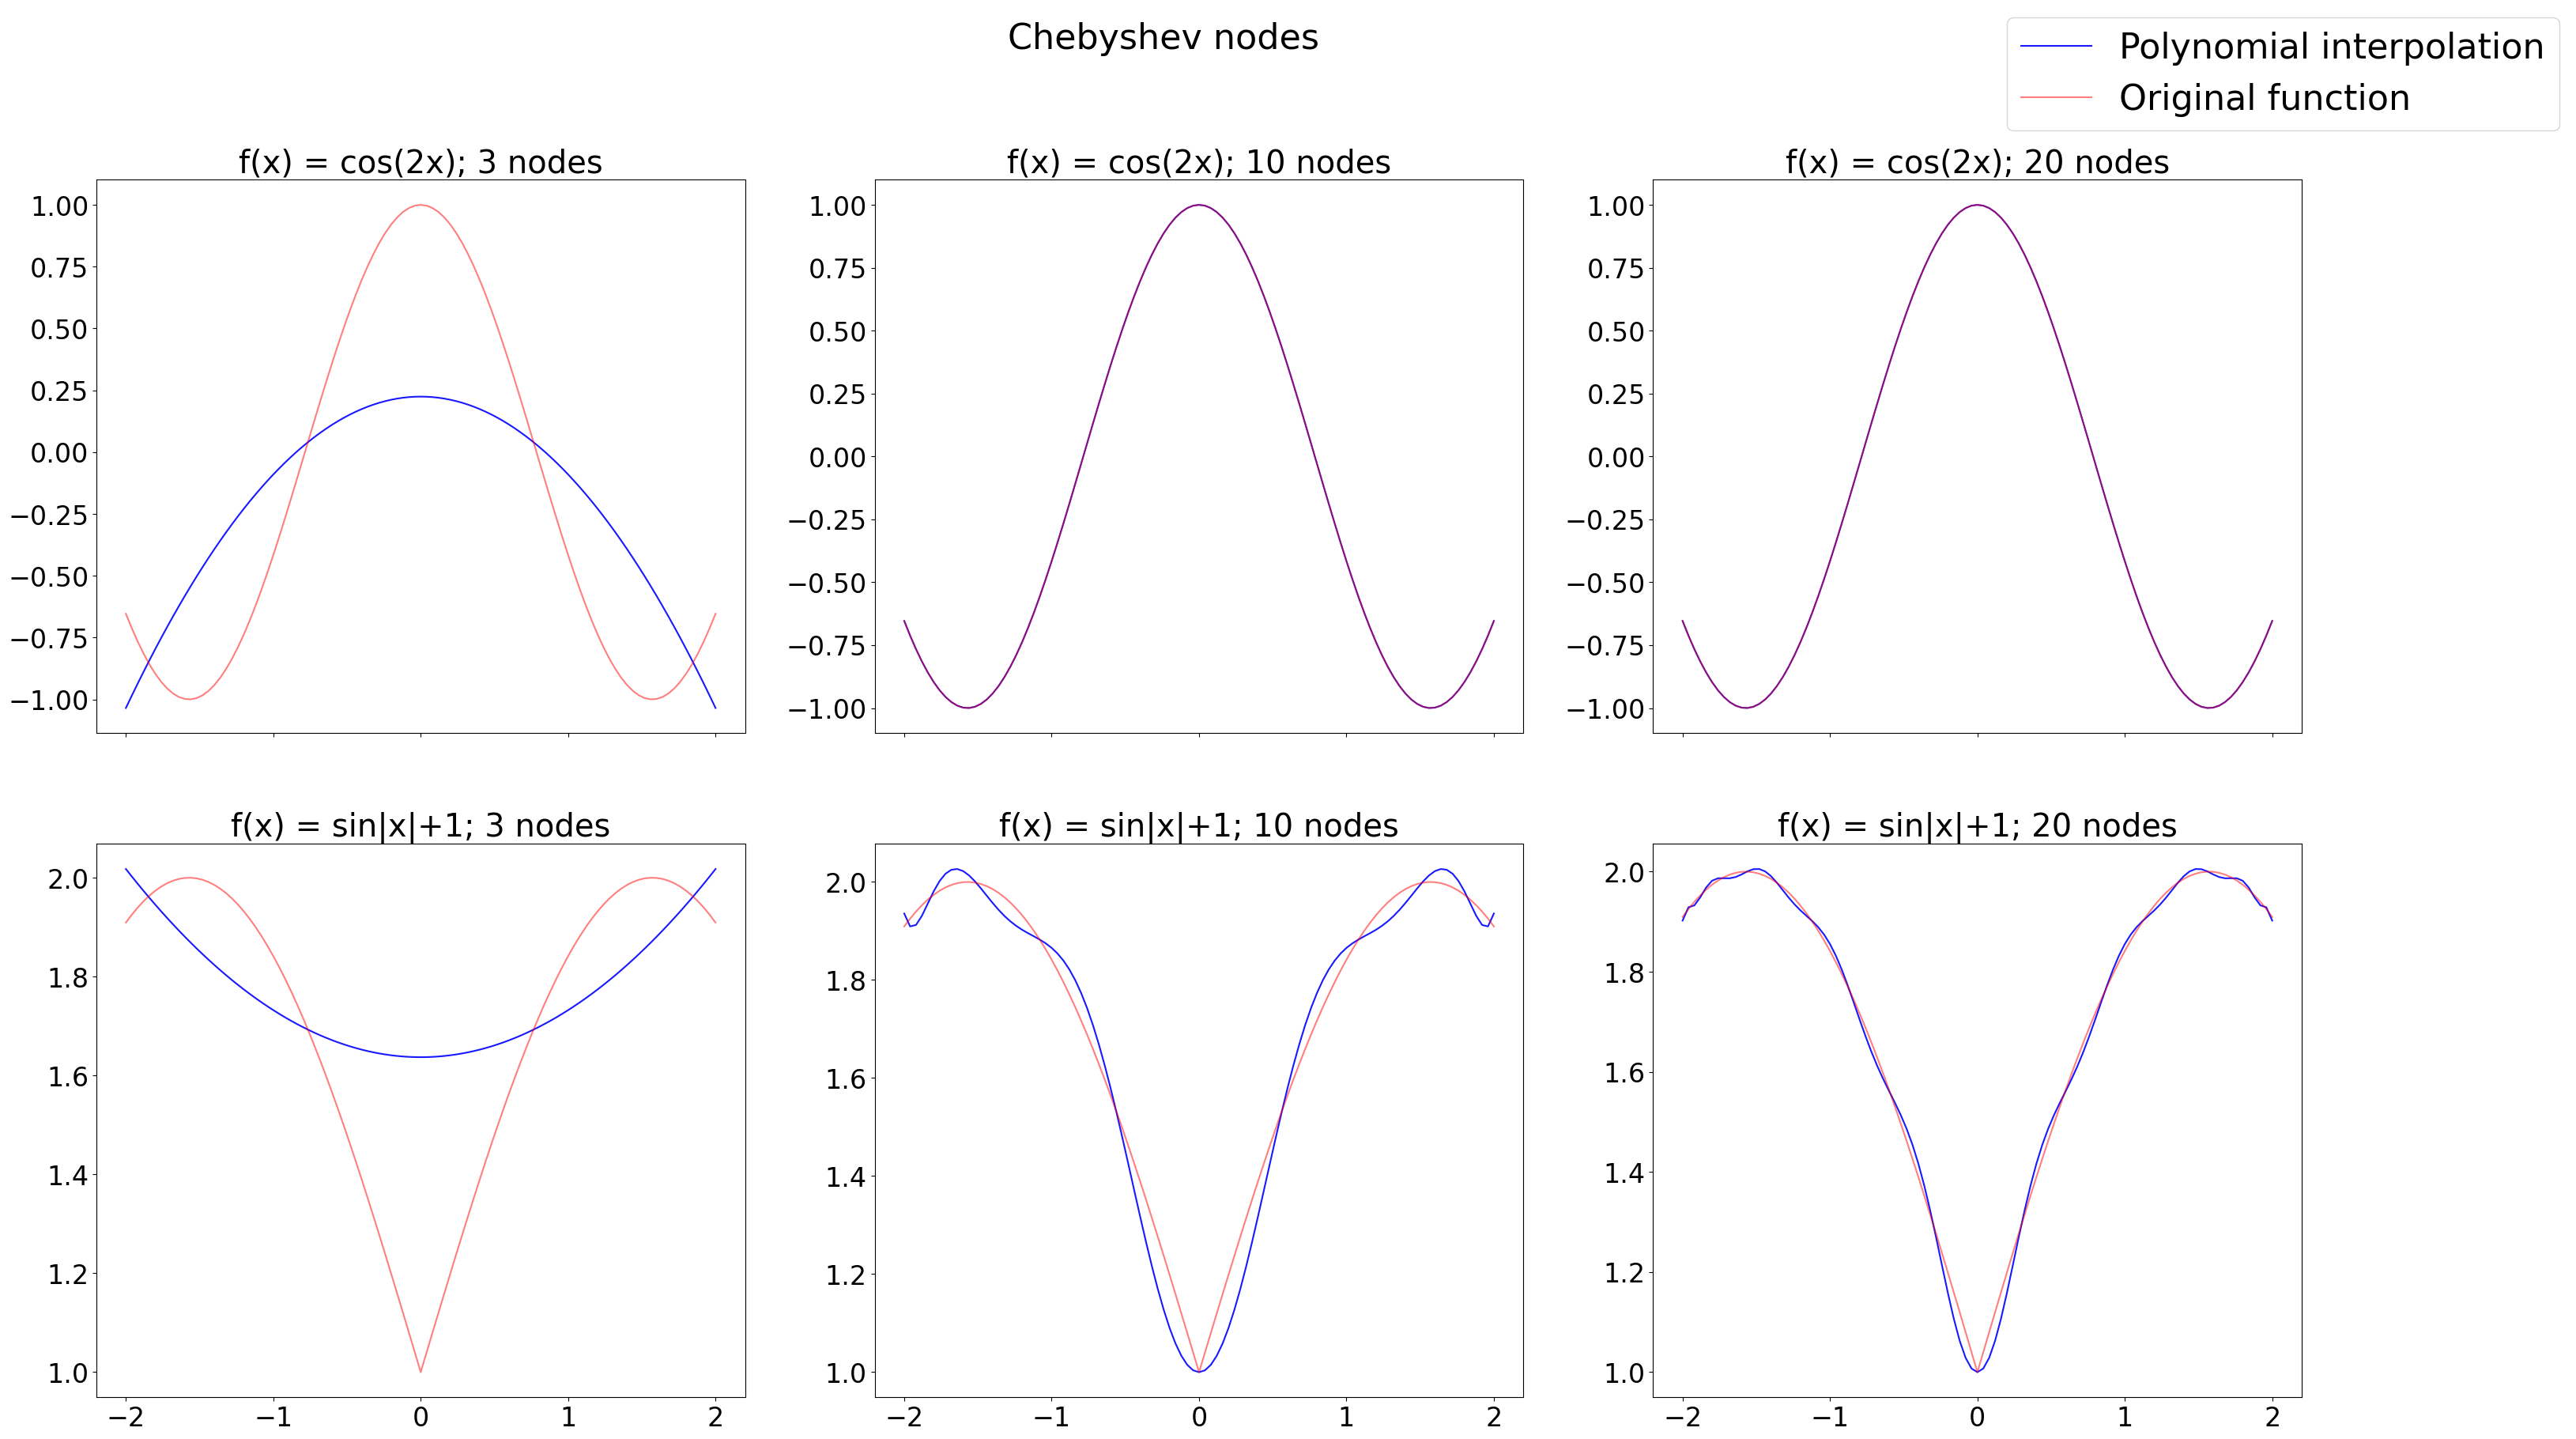

In [218]:
fig, axis = plt.subplots(2,3, sharex = True)
fig.suptitle("Chebyshev nodes", fontsize = 32)
fig.set_size_inches(36,20)
paintGraphInterp(axis[0,0], 3, f1, True)
paintGraphInterp(axis[0,1], 10, f1, True)  
paintGraphInterp(axis[0,2], 20, f1, True)
paintGraphInterp(axis[1,0], 3, f2, True)
paintGraphInterp(axis[1,1], 10, f2, True)
paintGraphInterp(axis[1,2], 20, f2, True)
axis[0,0].set_title("f(x) = cos(2x); 3 nodes")
axis[0,1].set_title("f(x) = cos(2x); 10 nodes")
axis[0,2].set_title("f(x) = cos(2x); 20 nodes")
axis[1,0].set_title("f(x) = sin|x|+1; 3 nodes")
axis[1,1].set_title("f(x) = sin|x|+1; 10 nodes")
axis[1,2].set_title("f(x) = sin|x|+1; 20 nodes");
lines, labels = axis[0,0].get_legend_handles_labels() 
fig.legend(lines, labels, fontsize = 32)
fig.savefig("Chebyshev_nodes.png",dpi = 200)

### Построение таблицы погрешностей для $P_{2,n}$ и  $C_{2,n}$

In [219]:
errorEqual = DataFrame({"$P_{2,n}$" : [np.max(np.abs(NewtonInterpolation(
    dividedDifference(chebyshevNodes(n), f1(chebyshevNodes(n))),  
    chebyshevNodes(n), equalNodes(100)) - f2(equalNodes(100)))) for n in range(3,31)],
                        "$C_{2,n}$" : [np.max(np.abs(NewtonInterpolation(
                            dividedDifference(chebyshevNodes(n), f2(chebyshevNodes(n))),
                            chebyshevNodes(n), equalNodes(100)) - f2(equalNodes(100)))) for n in range(3,31)]})
errorEqual.index = range(3,31)
errorEqual.index.name = "$n$"
#errorEqual.to_excel("Error_Chebyshev.xlsx")
errorEqual

,"$P_{2,n}$","$C_{2,n}$"
$n$,,
3,2.944196,0.637071
4,3.159382,0.261665
5,3.068163,0.369878
6,2.999973,0.177666
7,3.004756,0.263084
8,2.999102,0.135838
9,2.999368,0.206283
10,2.999717,0.110151
11,2.999705,0.170198
